In [1]:
import re
import pandas as pd
import sys 
sys.path.append(r'C:\Python312\Lib\site-packages')
from LatvianStemmer import stem
import nltk
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Datu nolasīšana no .csv faila
dati_apm = pd.read_csv('apm.csv', sep=';')
dati_test = pd.read_csv('test.csv', sep=';')
dati_neat = pd.read_csv('lv.csv', sep=';')
# Datu izvade
print(f'Fails satur {dati_apm.shape[0]} rindas un {dati_apm.shape[1]} kolonnas.')
print(f'Fails satur {dati_test.shape[0]} rindas un {dati_test.shape[1]} kolonnas.')
print(f'Fails satur {dati_neat.shape[0]} rindas un {dati_neat.shape[1]} kolonnas.')

display(dati_apm.head())
display(dati_test.head())
display(dati_neat.head())

# pieturvārdi latviešu valodā
pieturvardi = ["aiz","ap","ar","apakš","ārpus","augšpus","bez","caur","dēļ","gar","iekš","iz","kopš",  
               "labad","lejpus","līdz","no","otrpus","pa","par","pār","pēc","pie","pirms","pret","priekš",
               "starp","šaipus","uz","viņpus","virs","virspus","zem","apakšpus","un","bet","jo","ja","ka",
               "lai","tomēr","tikko","turpretī","arī","kaut","gan","tādēļ","tā","ne","tikvien","vien","kā",
               "ir","te","vai","kamēr","diezin","droši","diemžēl","nebūt","ik","it","taču","nu","pat","tiklab",
               "iekšpus","nedz","tik","nevis","turpretim","jeb","iekam","iekām","iekāms","kolīdz","līdzko",
               "tiklīdz","jebšu","tālab","tāpēc","nekā","itin","jā","jau","jel","nē","nezin","tad", "tikai",
               "vis","tak","iekams","būt","biju","biji","bija","bijām","bijāt","esmu","esi","esam","esat","būšu",
               "būsi","būs","būsim","būsiet","tikt","tiku","tiki","tika","tikām","tikāt","tieku","tiec","tiek",
               "tiekam","tiekat","tikšu","tiks","tiksim","tiksiet","tapt","tapi","tapāt", "topat", "tapšu", "tapsi", 
               "taps", "tapsim", "tapsiet", "kļūt", "kļuvu", "kļuvi", "kļuva", "kļuvām", "kļuvāt", "kļūstu", "kļūsti", 
               "kļūst", "kļūstam", "kļūstat", "kļūšu", "kļūsi", "kļūs", "kļūsim", "kļūsiet", "varēt", "varēju", "varējām",
               "varēšu", "varēsim", "var", "varēji", "varējāt", "varēsi", "varēsiet", "varat", "varēja", "varēs", "cik",
               "es", "tev", "tevi", "mēs", "mūsu", "tu","jūs","jūsu", "man","manis", "manim", "manīm", "tavs", "tava","tavi",
               "tavas", "ak" "ko", "to", "šo", "tie", "tās", "kas", "kā", "visi","visu", "visa", "visās", "visos", "visas", 
               "visus", "visiem", "visām", "tajos", "tajās", "savs", "savi", "savas", "viņš", "viņa","viņas","viņam", "viņai",
               "viņiem", "viņām", "jums", "kurš", "kura", "kuras", "kuri", "kuriem", "kurām","viņu", "viņi","vēl", "nav","tas", 
               "ko", "kur", "kad", "tam", "tiem", "kāds", "kāda", "kādi", "kādas", "kādiem", "kādu", "kādai", 
              "kādām", "savu", "savas", "savām", "savas", "sava", "savus", "tāds", "tāda", "tādi" , "tādas", "tādām", 
               "tādiem", "sev","sevi", "kāpēc","būtu","mums", "mans", "mana", "manas", "mani","maniem","šie", "šos", "šiem", 
              "šajos", "šis", "šī", "šīs"]

#funkcija teksta attīrīšanai
def clean_text(text):
    #uz mazajiem burtiem
    text = text.lower()
    #noņem pieturzīmes
    text = re.sub(r'[^\w\s]', '', text)
    #noņem ciparus
    text=re.sub(r'\d+', '', text)
    #noņem vārdus, kuros ir mazāk par 3 burtiem
    text = ' '.join(word for word in text.split() if len(word) > 3)
    #pieturvārdu izņemšana
    for vards in pieturvardi: text = re.sub(r'\b' + re.escape(vards) + r'\b', '', text)
    #stemmatizācija
    text = ' '.join(stem(word) for word in text.split())
    #tokenizācija
    #text = text.split()
    return text

#teksta attīrīšana
dati_apm['latviski'] = dati_apm['latviski'].apply(clean_text)
dati_test['latviski'] = dati_test['latviski'].apply(clean_text)
dati_neat['teksts'] = dati_neat['teksts'].apply(clean_text)
#izvade
display(dati_test.head())
display(dati_apm.head())
display(dati_neat.head())



#teksti = ' '.join(dati_neat['teksts'].astype(str).tolist())

#makonis1 = WordCloud(width=800, height=400, background_color='white').generate(teksti)

#plt.figure(figsize=(10, 5))
#plt.imshow(makonis1, interpolation='bilinear')
#plt.title('Sarkastisko teikumu vārdu mākonis')
#plt.axis('off')
#plt.show()

Fails satur 6116 rindas un 4 kolonnas.
Fails satur 1777 rindas un 4 kolonnas.
Fails satur 1001 rindas un 3 kolonnas.


angliski  \
0  I recently heard a story about someone who mis...   
1  ... enjoy the same public freedoms as English ...   
2  ...and we have a future lawyer with us soooo.....   
3  ..aaand it's raining again after I left my umb...   
4  1 of my favorite things is being behind someon...   

                                            latviski  vērtība  \
0  "Taukains sprediķis ir tad, ja sprediķim nav s...        1   
1  ... baudīt tādas pašas sabiedriskās brīvības k...        1   
2  ...un ar mums kopā ir nākotnes jurists, tā ka....        1   
3  ...un atkal līst lietus pēc tam, kad atstāju l...        1   
4  1 no manām mīļākajām lietām ir atrasties aiz k...        1   

                                             atsauce  
0  https://www.kaggle.com/datasets/nikhiljohnk/tw...  
1  https://www.kaggle.com/datasets/nikhiljohnk/tw...  
2  https://www.kaggle.com/datasets/nikhiljohnk/tw...  
3  https://www.kaggle.com/datasets/nikhiljohnk/tw...  
4  https://www.kaggle.com/datasets/nikhiljohnk/tw...

angliski  \
0     10 resolutions every woman should make in 2017   
1            10 days that shook the regressive world   
2         10 delicious ways to cook with maple syrup   
3             10 reasons to visit scotland this year   
4  10 notable books of 2016 on black women's history   

                                            latviski  vērtība  \
0  10 apņemšanās, kas 2017. gadā būtu jāizpilda k...        0   
1       10 dienas, kas satricināja regresīvo pasauli        0   
2  10 garšīgi veidi, kā pagatavot ēdienu ar kļavu...        0   
3           10 iemesli, kāpēc šogad apmeklēt Skotiju        0   
4  10 ievērojamas 2016. gada grāmatas par melnāda...        0   

                                             atsauce  
0  https://www.kaggle.com/datasets/rmisra/news-he...  
1  https://www.kaggle.com/datasets/rmisra/news-he...  
2  https://www.kaggle.com/datasets/rmisra/news-he...  
3  https://www.kaggle.com/datasets/rmisra/news-he...  
4  https://www.kaggle.com/datasets/rmisra/news-he...

teksts  vērtība  \
0  – Ar ko programmētājs atšķiras no politiķa? – ...        1   
1  – Mīļais, atbrauc man pakaļ uz plastiskās ķiru...        1   
2  "Bayer" uzlabo Bundeslīgas komandu rekordu nez...        0   
3  "LDz loģistikas" apgrozījums pērn ievērojami s...        0   
4  "Rangers" hokejisti izcīna devīto uzvaru pēc k...        0   

                                             atsauce  
0                      https://anekdotes.eu/page/127  
1                        https://anekdotes.eu/page/6  
2  https://sportacentrs.com/futbols/vacija/240220...  
3  https://www.tvnet.lv/7981659/ldz-logistikas-ap...  
4  https://sportacentrs.com/hokejs/nhl/23022024-r...

angliski  \
0     10 resolutions every woman should make in 2017   
1            10 days that shook the regressive world   
2         10 delicious ways to cook with maple syrup   
3             10 reasons to visit scotland this year   
4  10 notable books of 2016 on black women's history   

                                        latviski  vērtība  \
0             apņemšan gad jāizpild katr sieviet        0   
1                dien satricināj regresīv pasaul        0   
2         garšīg veid pagatavot ēdien kļav sīrup        0   
3                   iemesl šogad apmeklēt skotij        0   
4  ievērojam gad grāmat melnādain sievieš vēstur        0   

                                             atsauce  
0  https://www.kaggle.com/datasets/rmisra/news-he...  
1  https://www.kaggle.com/datasets/rmisra/news-he...  
2  https://www.kaggle.com/datasets/rmisra/news-he...  
3  https://www.kaggle.com/datasets/rmisra/news-he...  
4  https://www.kaggle.com/datasets/rmisra/news-he...

angliski  \
0  I recently heard a story about someone who mis...   
1  ... enjoy the same public freedoms as English ...   
2  ...and we have a future lawyer with us soooo.....   
3  ..aaand it's raining again after I left my umb...   
4  1 of my favorite things is being behind someon...   

                                            latviski  vērtība  \
0                      taukain sprediķ sprediķ satur        1   
1  baudīt paš sabiedrisk brīvīb anglisk runājoš o...        1   
2                  kop nākotn jurist tumsonīg pulciņ        1   
3  atkal līst liet atstāj lietussarg mašīn šodien...        1   
4  man mīļāk liet atrasti brauc cilvēk run telefo...        1   

                                             atsauce  
0  https://www.kaggle.com/datasets/nikhiljohnk/tw...  
1  https://www.kaggle.com/datasets/nikhiljohnk/tw...  
2  https://www.kaggle.com/datasets/nikhiljohnk/tw...  
3  https://www.kaggle.com/datasets/nikhiljohnk/tw...  
4  https://www.kaggle.com/datasets/nikhiljohnk/tw...

teksts  vērtība  \
0  programmētāj atšķir politiķ programmētāj maks ...        1   
1  mīļ atbrauc pakaļ plastisk ķirurģij klīnik dār...        1   
2  bayer uzlab bundeslīg komand rekord nezaudēt s...        0   
3           loģistik apgrozījum pērn ievērojam saruc        0   
4             ranger hokejist izcīn devīt uzvar kārt        0   

                                             atsauce  
0                      https://anekdotes.eu/page/127  
1                        https://anekdotes.eu/page/6  
2  https://sportacentrs.com/futbols/vacija/240220...  
3  https://www.tvnet.lv/7981659/ldz-logistikas-ap...  
4  https://sportacentrs.com/hokejs/nhl/23022024-r...

In [69]:
#https://github.com/alik604/Sarcasm-Detection/blob/master/Sarcasm_Detection.ipynb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_vardi=10320
embedding_dim=100
max_garums=100
tokenizer = Tokenizer(num_words=max_vardi)
tokenizer.fit_on_texts(dati_apm.latviski)


apm_sekvences = tokenizer.texts_to_sequences(dati_apm.latviski)
apm_pads = pad_sequences(apm_sekvences, maxlen=max_garums)

neat_sekvences = tokenizer.texts_to_sequences(dati_neat.teksts)
neat_pads = pad_sequences(neat_sekvences, maxlen=max_garums)

test_sekvences = tokenizer.texts_to_sequences(dati_test.latviski)
test_pads = pad_sequences(test_sekvences, maxlen=max_garums)

In [70]:
#https://github.com/alik604/Sarcasm-Detection/blob/master/Sarcasm_Detection.ipynb
# CNN 

import tensorflow as tf
cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vardi, embedding_dim, input_shape=(max_garums,)),
    tf.keras.layers.Conv1D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


C:\Users\Megija\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
cnn.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 100, 100)       │     1,032,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 98, 32)         │         9,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 49, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │        25,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,066,753 (4.07 MB)

 Trainable params: 1,066,753 (4.07 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
##https://github.com/alik604/Sarcasm-Detection/blob/master/Sarcasm_Detection.ipynb
cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=cnn.fit(apm_pads, dati_apm.vērtība, batch_size=256,epochs=4, validation_data=(test_pads, dati_test.vērtība))
     

Epoch 1/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.5065 - loss: 0.6920 - val_accuracy: 0.6989 - val_loss: 0.6793
Epoch 2/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7847 - loss: 0.6419 - val_accuracy: 0.7586 - val_loss: 0.5549
Epoch 3/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8736 - loss: 0.3957 - val_accuracy: 0.7907 - val_loss: 0.4506
Epoch 4/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9405 - loss: 0.1760 - val_accuracy: 0.8042 - val_loss: 0.4764


In [73]:

history_neat=cnn.fit(apm_pads, dati_apm.vērtība, batch_size=256,epochs=3, validation_data=(neat_pads, dati_neat.vērtība))
     

Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9784 - loss: 0.0826 - val_accuracy: 0.6793 - val_loss: 0.9348
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9883 - loss: 0.0456 - val_accuracy: 0.6763 - val_loss: 1.0750
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9937 - loss: 0.0290 - val_accuracy: 0.6743 - val_loss: 1.1717


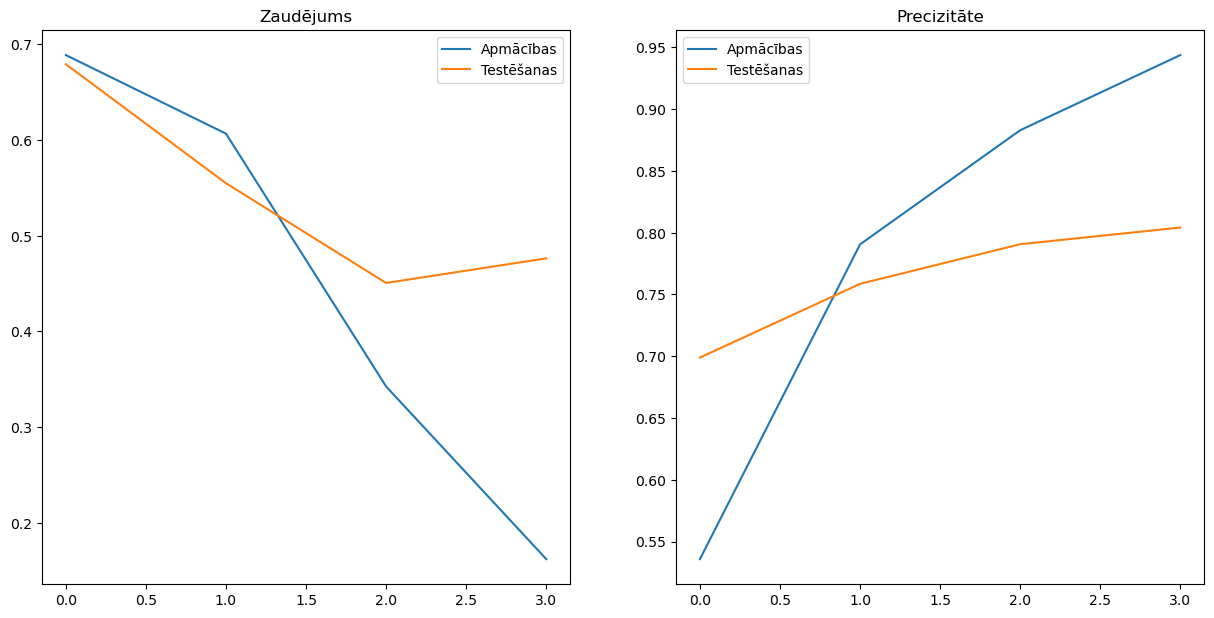

In [74]:
#https://github.com/shekarroy15/NLP_Sarcasm_Detection/blob/main/Sarcasam_Detector.ipynb
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))

ax1.plot(history.history['loss'], label = 'Apmācības')
ax1.plot(history.history['val_loss'], label = 'Testēšanas')
ax1.set_title('Zaudējums')
ax1.legend(['Apmācības', 'Testēšanas'])

ax2.plot(history.history['accuracy'], label = 'Apmācības')
ax2.plot(history.history['val_accuracy'], label = 'Testēšanas')
ax2.set_title('Precizitāte')
ax2.legend(['Apmācības', 'Testēšanas'])

plt.show()

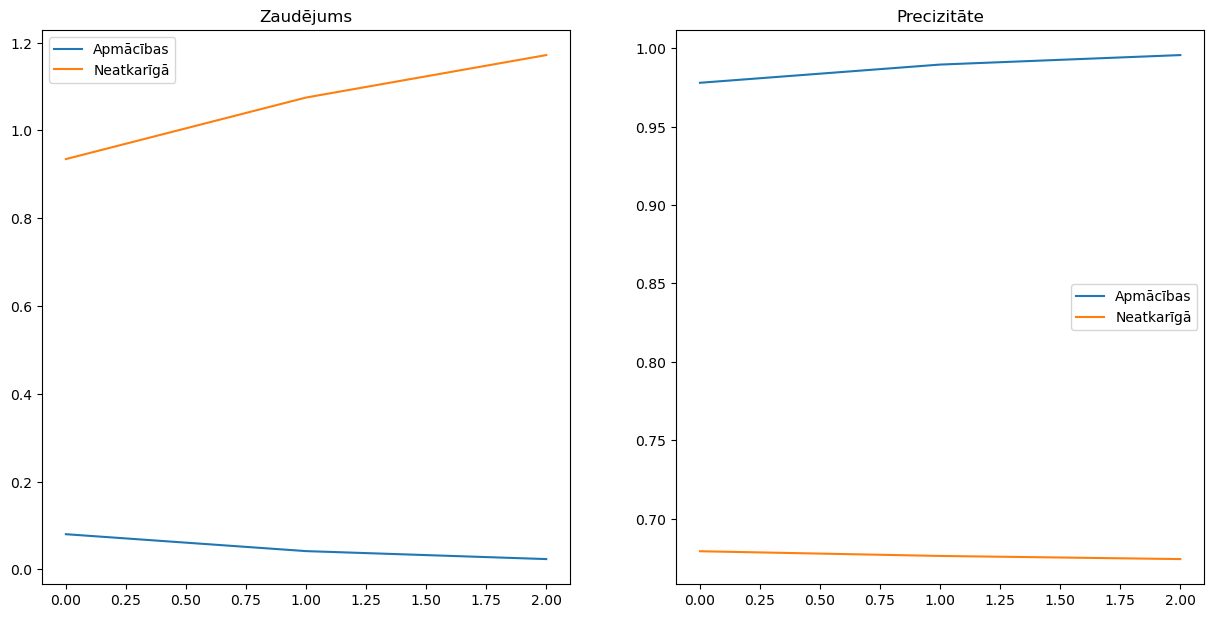

In [75]:
#https://github.com/shekarroy15/NLP_Sarcasm_Detection/blob/main/Sarcasam_Detector.ipynb
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))

ax1.plot(history_neat.history['loss'], label = 'Apmācības')
ax1.plot(history_neat.history['val_loss'], label = 'Neatkarīgā')
ax1.set_title('Zaudējums')
ax1.legend(['Apmācības', 'Neatkarīgā'])

ax2.plot(history_neat.history['accuracy'], label = 'Apmācības')
ax2.plot(history_neat.history['val_accuracy'], label = 'Neatkarīgā')
ax2.set_title('Precizitāte')
ax2.legend(['Apmācības', 'Neatkarīgā'])

plt.show()

In [76]:
#https://github.com/SanjarH/Sarcasm-Detection/blob/main/News%20Headlines%20Dataset%20For%20Sarcasm%20Detection_2.ipynb

prognozes_cnn_apm = (cnn.predict(apm_pads) > 0.5).astype("int32")
print(classification_report(dati_apm['vērtība'], prognozes_cnn_apm))

prognozes_cnn_test = (cnn.predict(test_pads) > 0.5).astype("int32")
print(classification_report(dati_test['vērtība'], prognozes_cnn_test))

prognozes_cnn_neat= (cnn.predict(neat_pads) > 0.5).astype("int32")
print(classification_report(dati_neat['vērtība'], prognozes_cnn_neat))

192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3016
           1       1.00      1.00      1.00      3100

    accuracy                           1.00      6116
   macro avg       1.00      1.00      1.00      6116
weighted avg       1.00      1.00      1.00      6116

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       863
           1       0.84      0.74      0.79       914

    accuracy                           0.80      1777
   macro avg       0.80      0.80      0.79      1777
weighted avg       0.80      0.80      0.79      1777

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       501
           1       0.67      0.67      0.67       500

    accuracy                           0.67      1001
   macro 

In [127]:
score_cnn= cnn.evaluate(test_pads, dati_test.vērtība)
print('Precizitāte:', score_cnn[1])
score_cnn2= cnn.evaluate(neat_pads, dati_neat.vērtība)
print('Precizitāte:', score_cnn2[1])

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7959 - loss: 0.6377
Precizitāte: 0.7951603531837463
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6718 - loss: 1.1769
Precizitāte: 0.6743256449699402


In [77]:
from sklearn.metrics import confusion_matrix

# confusion matricas izveide
conf_matrixs = confusion_matrix(dati_test.vērtība, prognozes_cnn_test)

# vērtību definēšana
patiesi_negativi = conf_matrixs[0, 0]
nepatiesi_pozitivi = conf_matrixs[0, 1]
nepatiesi_negativi = conf_matrixs[1, 0]
patiesi_pozitivi = conf_matrixs[1, 1]
# izvade
print("Patiesi negatīvi:", patiesi_negativi)
print("Nepatiesi pozitīvi:", nepatiesi_pozitivi)
print("Nepatiesi negatīvi:", nepatiesi_negativi)
print("Patiesi pozitīvi:", patiesi_pozitivi)


Patiesi negatīvi: 735
Nepatiesi pozitīvi: 128
Nepatiesi negatīvi: 236
Patiesi pozitīvi: 678


In [78]:

# confusion matricas izveide
conf_matrixs = confusion_matrix(dati_neat.vērtība, prognozes_cnn_neat)

# vērtību definēšana
patiesi_negativi = conf_matrixs[0, 0]
nepatiesi_pozitivi = conf_matrixs[0, 1]
nepatiesi_negativi = conf_matrixs[1, 0]
patiesi_pozitivi = conf_matrixs[1, 1]
# izvade
print("Patiesi negatīvi:", patiesi_negativi)
print("Nepatiesi pozitīvi:", nepatiesi_pozitivi)
print("Nepatiesi negatīvi:", nepatiesi_negativi)
print("Patiesi pozitīvi:", patiesi_pozitivi)

Patiesi negatīvi: 338
Nepatiesi pozitīvi: 163
Nepatiesi negatīvi: 163
Patiesi pozitīvi: 337


In [88]:
# cnn - neat Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_neat.iterrows():
    print(f"Rinda {index}:")
    for column in dati_neat.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognozes_cnn_neat[index]}")
    print("\n")

Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
teksts: programmētāj atšķir politiķ programmētāj maks programm strād
vērtība: 1
atsauce: https://anekdotes.eu/page/127
Reālā vērtība: 1, Klasificētā vērtība: [0]


Rinda 1:
teksts: mīļ atbrauc pakaļ plastisk ķirurģij klīnik dārg atpazīš
vērtība: 1
atsauce: https://anekdotes.eu/page/6
Reālā vērtība: 1, Klasificētā vērtība: [0]


Rinda 2:
teksts: bayer uzlab bundeslīg komand rekord nezaudēt spēl virkn
vērtība: 0
atsauce: https://sportacentrs.com/futbols/vacija/24022024-bayer_uzstada_bundesligas_komandu_rekordu
Reālā vērtība: 0, Klasificētā vērtība: [0]


Rinda 3:
teksts: loģistik apgrozījum pērn ievērojam saruc
vērtība: 0
atsauce: https://www.tvnet.lv/7981659/ldz-logistikas-apgrozijums-pern-ieverojami-sarucis
Reālā vērtība: 0, Klasificētā vērtība: [0]


Rinda 4:
teksts: ranger hokejist izcīn devīt uzvar kārt
vērtība: 0
atsauce: https://sportacentrs.com/hokejs/nhl/23022024-rangers_hokejisti_izcina_devito_uzvaru_pe
Reālā vērtība:

In [79]:
#gru
import tensorflow as tf

gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vardi, embedding_dim, input_shape=(max_garums,)),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = gru.fit(apm_pads, dati_apm.vērtība, batch_size=256, epochs=5, validation_data=(test_pads, dati_test.vērtība))


Epoch 1/5


C:\Users\Megija\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 210ms/step - accuracy: 0.5796 - loss: 0.6865 - val_accuracy: 0.6894 - val_loss: 0.6309
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.8264 - loss: 0.5171 - val_accuracy: 0.7496 - val_loss: 0.5088
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.9160 - loss: 0.2316 - val_accuracy: 0.7901 - val_loss: 0.5504
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.9623 - loss: 0.1156 - val_accuracy: 0.7845 - val_loss: 0.5843
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.9857 - loss: 0.0501 - val_accuracy: 0.7912 - val_loss: 0.6975


In [80]:

history2 = gru.fit(apm_pads, dati_apm.vērtība, batch_size=256, epochs=4, validation_data=(neat_pads, dati_neat.vērtība))

Epoch 1/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.9942 - loss: 0.0218 - val_accuracy: 0.6773 - val_loss: 1.4977
Epoch 2/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.9977 - loss: 0.0106 - val_accuracy: 0.6693 - val_loss: 1.5680
Epoch 3/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.9999 - loss: 0.0042 - val_accuracy: 0.6743 - val_loss: 1.7093
Epoch 4/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.9995 - loss: 0.0053 - val_accuracy: 0.6773 - val_loss: 1.8307


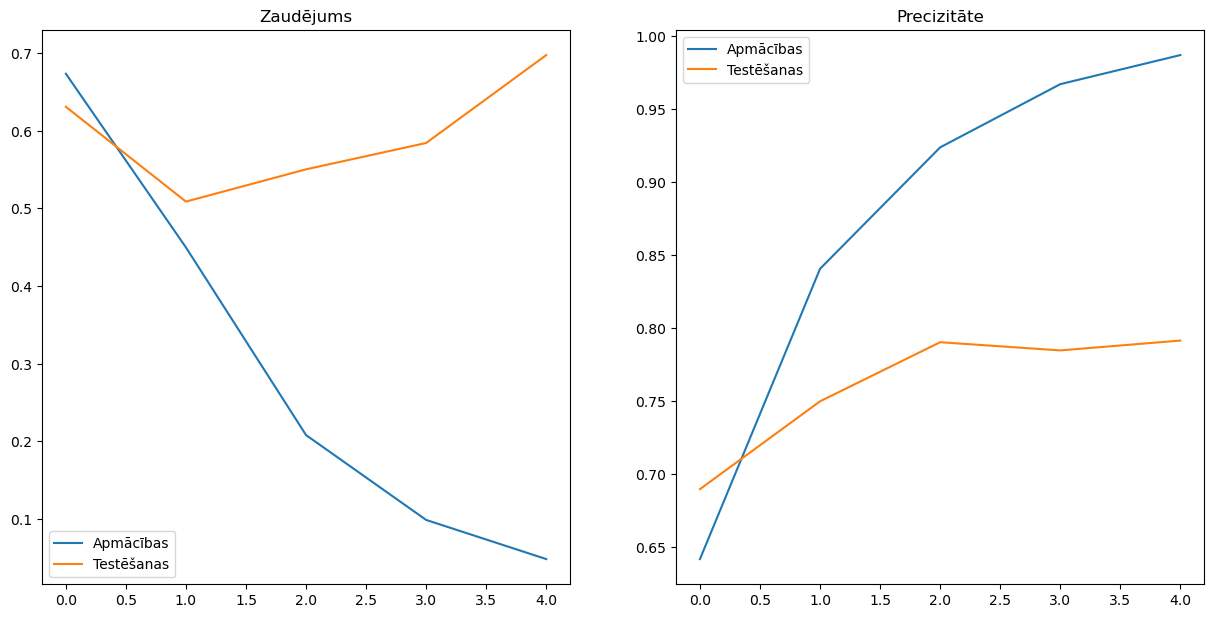

In [81]:
#https://github.com/shekarroy15/NLP_Sarcasm_Detection/blob/main/Sarcasam_Detector.ipynb
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))

ax1.plot(history1.history['loss'], label = 'Apmācības')
ax1.plot(history1.history['val_loss'], label = 'Testēšanas')
ax1.set_title('Zaudējums')
ax1.legend(['Apmācības', 'Testēšanas'])

ax2.plot(history1.history['accuracy'], label = 'Apmācības')
ax2.plot(history1.history['val_accuracy'], label = 'Testēšanas')
ax2.set_title('Precizitāte')
ax2.legend(['Apmācības', 'Testēšanas'])

plt.show()

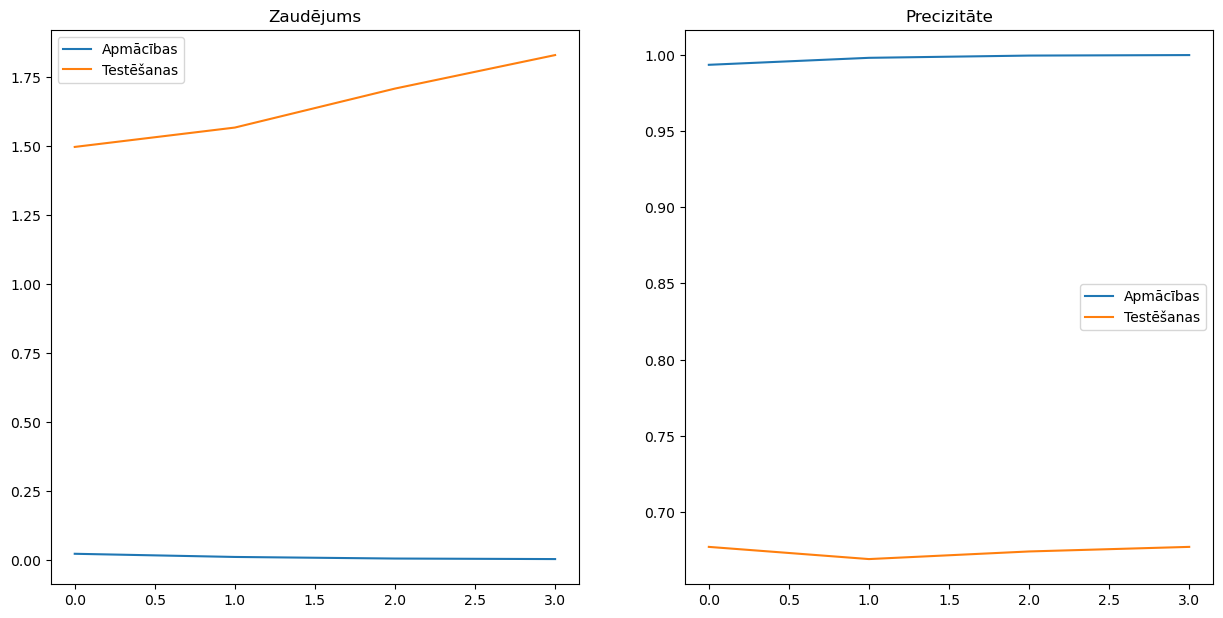

In [82]:
#https://github.com/shekarroy15/NLP_Sarcasm_Detection/blob/main/Sarcasam_Detector.ipynb
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))

ax1.plot(history2.history['loss'], label = 'Apmācības')
ax1.plot(history2.history['val_loss'], label = 'Testēšanas')
ax1.set_title('Zaudējums')
ax1.legend(['Apmācības', 'Testēšanas'])

ax2.plot(history2.history['accuracy'], label = 'Apmācības')
ax2.plot(history2.history['val_accuracy'], label = 'Testēšanas')
ax2.set_title('Precizitāte')
ax2.legend(['Apmācības', 'Testēšanas'])

plt.show()

In [83]:

prognozes_gru_apm = (gru.predict(apm_pads) > 0.5).astype("int32")
print(classification_report(dati_apm['vērtība'], prognozes_gru_apm))

prognozes_gru_test = (gru.predict(test_pads) > 0.5).astype("int32")
print(classification_report(dati_test['vērtība'], prognozes_gru_test))

prognozes_gru_neat= (gru.predict(neat_pads) > 0.5).astype("int32")
print(classification_report(dati_neat['vērtība'], prognozes_gru_neat))

192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3016
           1       1.00      1.00      1.00      3100

    accuracy                           1.00      6116
   macro avg       1.00      1.00      1.00      6116
weighted avg       1.00      1.00      1.00      6116

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       863
           1       0.81      0.76      0.78       914

    accuracy                           0.78      1777
   macro avg       0.78      0.78      0.78      1777
weighted avg       0.78      0.78      0.78      1777

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

           0       0.70      0.61      0.66       501
           1       0.66      0.74      0.70       500

    accuracy                           0.68      1001
   mac

In [128]:
score_gru= gru.evaluate(test_pads, dati_test.vērtība)
print('Precizitāte:', score_gru[1])
score_gru2= gru.evaluate(neat_pads, dati_val.vērtība)
print('Precizitāte:', score_gru2[1])

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7689 - loss: 1.1245
Precizitāte: 0.7822172045707703
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6666 - loss: 1.8508
Precizitāte: 0.6773226857185364


In [84]:

# confusion matricas izveide
conf_matrixs = confusion_matrix(dati_test.vērtība, prognozes_gru_test)

# vērtību definēšana
patiesi_negativi = conf_matrixs[0, 0]
nepatiesi_pozitivi = conf_matrixs[0, 1]
nepatiesi_negativi = conf_matrixs[1, 0]
patiesi_pozitivi = conf_matrixs[1, 1]
# izvade
print("Patiesi negatīvi:", patiesi_negativi)
print("Nepatiesi pozitīvi:", nepatiesi_pozitivi)
print("Nepatiesi negatīvi:", nepatiesi_negativi)
print("Patiesi pozitīvi:", patiesi_pozitivi)

Patiesi negatīvi: 699
Nepatiesi pozitīvi: 164
Nepatiesi negatīvi: 223
Patiesi pozitīvi: 691


In [85]:

# confusion matricas izveide
conf_matrixs = confusion_matrix(dati_neat.vērtība, prognozes_gru_neat)

# vērtību definēšana
patiesi_negativi = conf_matrixs[0, 0]
nepatiesi_pozitivi = conf_matrixs[0, 1]
nepatiesi_negativi = conf_matrixs[1, 0]
patiesi_pozitivi = conf_matrixs[1, 1]
# izvade
print("Patiesi negatīvi:", patiesi_negativi)
print("Nepatiesi pozitīvi:", nepatiesi_pozitivi)
print("Nepatiesi negatīvi:", nepatiesi_negativi)
print("Patiesi pozitīvi:", patiesi_pozitivi)

Patiesi negatīvi: 308
Nepatiesi pozitīvi: 193
Nepatiesi negatīvi: 130
Patiesi pozitīvi: 370


In [86]:
# gru - neat Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_neat.iterrows():
    print(f"Rinda {index}:")
    for column in dati_neat.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognozes_gru_neat[index]}")
    print("\n")

Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
teksts: programmētāj atšķir politiķ programmētāj maks programm strād
vērtība: 1
atsauce: https://anekdotes.eu/page/127
Reālā vērtība: 1, Klasificētā vērtība: [1]


Rinda 1:
teksts: mīļ atbrauc pakaļ plastisk ķirurģij klīnik dārg atpazīš
vērtība: 1
atsauce: https://anekdotes.eu/page/6
Reālā vērtība: 1, Klasificētā vērtība: [1]


Rinda 2:
teksts: bayer uzlab bundeslīg komand rekord nezaudēt spēl virkn
vērtība: 0
atsauce: https://sportacentrs.com/futbols/vacija/24022024-bayer_uzstada_bundesligas_komandu_rekordu
Reālā vērtība: 0, Klasificētā vērtība: [1]


Rinda 3:
teksts: loģistik apgrozījum pērn ievērojam saruc
vērtība: 0
atsauce: https://www.tvnet.lv/7981659/ldz-logistikas-apgrozijums-pern-ieverojami-sarucis
Reālā vērtība: 0, Klasificētā vērtība: [0]


Rinda 4:
teksts: ranger hokejist izcīn devīt uzvar kārt
vērtība: 0
atsauce: https://sportacentrs.com/hokejs/nhl/23022024-rangers_hokejisti_izcina_devito_uzvaru_pe
Reālā vērtība:

In [105]:
#https://github.com/alik604/Sarcasm-Detection/blob/master/Sarcasm_Detection.ipynb
#biGRU 
bigru = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vardi, embedding_dim, input_shape=(max_garums,)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


C:\Users\Megija\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [106]:

bigru.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 100, 100)       │     1,032,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        63,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,097,825 (4.19 MB)

 Trainable params: 1,097,825 (4.19 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
#https://github.com/alik604/Sarcasm-Detection/blob/master/Sarcasm_Detection.ipynb
bigru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history3=bigru.fit(apm_pads, dati_apm.vērtība, batch_size=256,epochs=5, validation_data=(test_pads, dati_test.vērtība))
     

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 397ms/step - accuracy: 0.5225 - loss: 0.6902 - val_accuracy: 0.7310 - val_loss: 0.6487
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step - accuracy: 0.8418 - loss: 0.5468 - val_accuracy: 0.7456 - val_loss: 0.5351
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 405ms/step - accuracy: 0.9071 - loss: 0.2569 - val_accuracy: 0.7890 - val_loss: 0.4828
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 431ms/step - accuracy: 0.9587 - loss: 0.1221 - val_accuracy: 0.7817 - val_loss: 0.5418
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 392ms/step - accuracy: 0.9817 - loss: 0.0682 - val_accuracy: 0.7968 - val_loss: 0.6014


In [108]:
#https://github.com/alik604/Sarcasm-Detection/blob/master/Sarcasm_Detection.ipynb

history4=bigru.fit(apm_pads, dati_apm.vērtība, batch_size=256,epochs=2, validation_data=(neat_pads, dati_neat.vērtība))
     

Epoch 1/2
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 389ms/step - accuracy: 0.9647 - loss: 0.0954 - val_accuracy: 0.6823 - val_loss: 1.1313
Epoch 2/2
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 372ms/step - accuracy: 0.9834 - loss: 0.0602 - val_accuracy: 0.6863 - val_loss: 1.3009


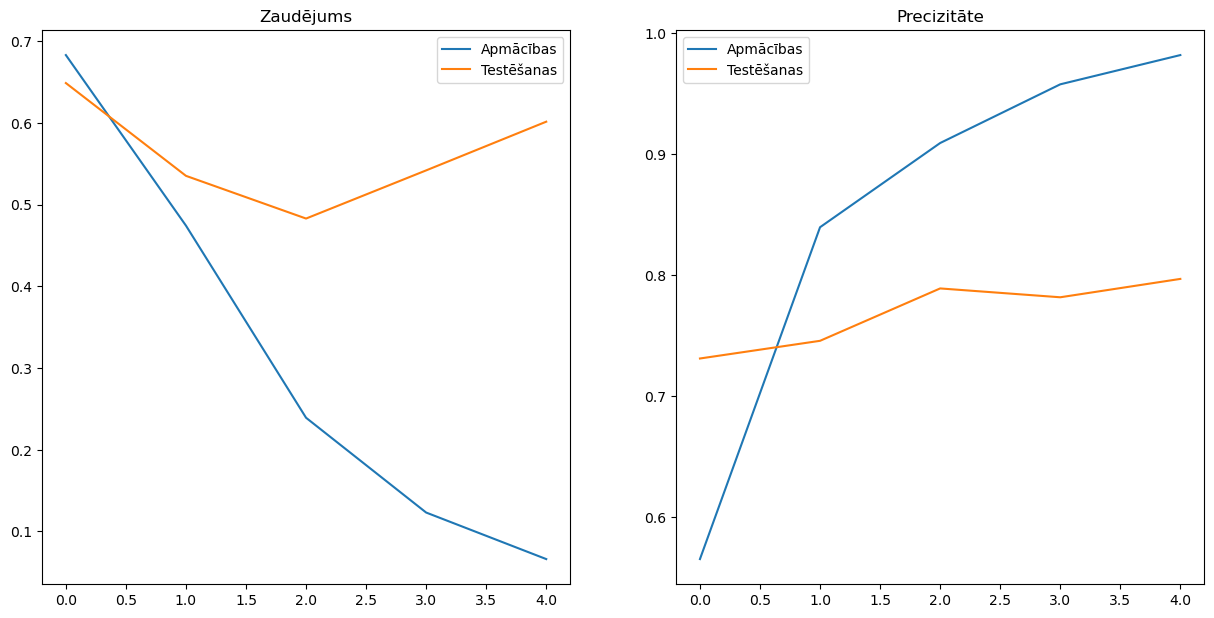

In [109]:
#https://github.com/shekarroy15/NLP_Sarcasm_Detection/blob/main/Sarcasam_Detector.ipynb
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))

ax1.plot(history3.history['loss'], label = 'Apmācības')
ax1.plot(history3.history['val_loss'], label = 'Testēšanas')
ax1.set_title('Zaudējums')
ax1.legend(['Apmācības', 'Testēšanas'])

ax2.plot(history3.history['accuracy'], label = 'Apmācības')
ax2.plot(history3.history['val_accuracy'], label = 'Testēšanas')
ax2.set_title('Precizitāte')
ax2.legend(['Apmācības', 'Testēšanas'])

plt.show()

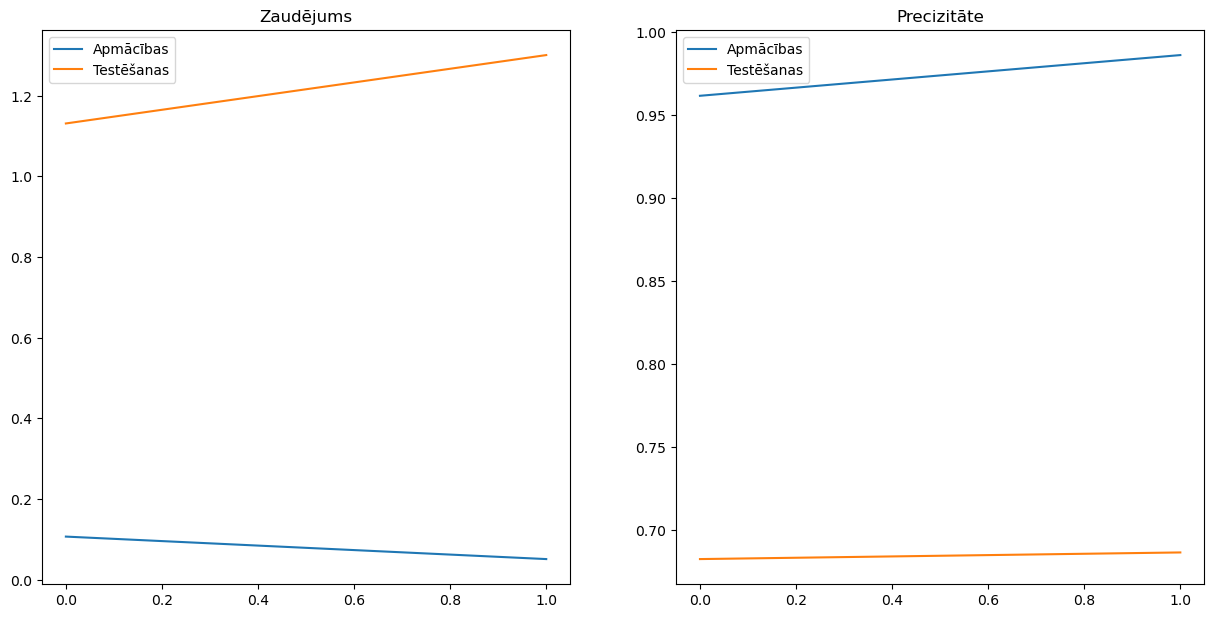

In [110]:
#https://github.com/shekarroy15/NLP_Sarcasm_Detection/blob/main/Sarcasam_Detector.ipynb
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))

ax1.plot(history4.history['loss'], label = 'Apmācības')
ax1.plot(history4.history['val_loss'], label = 'Testēšanas')
ax1.set_title('Zaudējums')
ax1.legend(['Apmācības', 'Testēšanas'])

ax2.plot(history4.history['accuracy'], label = 'Apmācības')
ax2.plot(history4.history['val_accuracy'], label = 'Testēšanas')
ax2.set_title('Precizitāte')
ax2.legend(['Apmācības', 'Testēšanas'])

plt.show()

In [111]:

prognozes_bigru_apm = (bigru.predict(apm_pads) > 0.5).astype("int32")
print(classification_report(dati_apm['vērtība'], prognozes_bigru_apm))

prognozes_bigru_test = (bigru.predict(test_pads) > 0.5).astype("int32")
print(classification_report(dati_test['vērtība'], prognozes_bigru_test))

prognozes_bigru_neat= (bigru.predict(neat_pads) > 0.5).astype("int32")
print(classification_report(dati_neat['vērtība'], prognozes_bigru_neat))

192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3016
           1       0.99      0.99      0.99      3100

    accuracy                           0.99      6116
   macro avg       0.99      0.99      0.99      6116
weighted avg       0.99      0.99      0.99      6116

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       863
           1       0.81      0.72      0.76       914

    accuracy                           0.77      1777
   macro avg       0.77      0.77      0.77      1777
weighted avg       0.77      0.77      0.77      1777

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       501
           1       0.68      0.71      0.69       500

    accuracy                           0.69      1001
   mac

In [129]:
score_bigru= bigru.evaluate(test_pads, dati_test.vērtība)
print('Precizitāte:', score_bigru[1])
score_bigru2= bigru.evaluate(neat_pads, dati_val.vērtība)
print('Precizitāte:', score_bigru2[1])

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7740 - loss: 0.7827
Precizitāte: 0.7703995704650879
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6790 - loss: 1.3337
Precizitāte: 0.6863136887550354


In [114]:

# confusion matricas izveide
conf_matrixs = confusion_matrix(dati_test.vērtība, prognozes_bigru_test)

# vērtību definēšana
patiesi_negativi = conf_matrixs[0, 0]
nepatiesi_pozitivi = conf_matrixs[0, 1]
nepatiesi_negativi = conf_matrixs[1, 0]
patiesi_pozitivi = conf_matrixs[1, 1]
# izvade
print("Patiesi negatīvi:", patiesi_negativi)
print("Nepatiesi pozitīvi:", nepatiesi_pozitivi)
print("Nepatiesi negatīvi:", nepatiesi_negativi)
print("Patiesi pozitīvi:", patiesi_pozitivi)

Patiesi negatīvi: 711
Nepatiesi pozitīvi: 152
Nepatiesi negatīvi: 256
Patiesi pozitīvi: 658


In [115]:

# confusion matricas izveide
conf_matrixs = confusion_matrix(dati_neat.vērtība, prognozes_bigru_neat)

# vērtību definēšana
patiesi_negativi = conf_matrixs[0, 0]
nepatiesi_pozitivi = conf_matrixs[0, 1]
nepatiesi_negativi = conf_matrixs[1, 0]
patiesi_pozitivi = conf_matrixs[1, 1]
# izvade
print("Patiesi negatīvi:", patiesi_negativi)
print("Nepatiesi pozitīvi:", nepatiesi_pozitivi)
print("Nepatiesi negatīvi:", nepatiesi_negativi)
print("Patiesi pozitīvi:", patiesi_pozitivi)

Patiesi negatīvi: 332
Nepatiesi pozitīvi: 169
Nepatiesi negatīvi: 145
Patiesi pozitīvi: 355


In [116]:
# bigru -neat Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_neat.iterrows():
    print(f"Rinda {index}:")
    for column in dati_neat.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognozes_bigru_neat[index]}")
    print("\n")

Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
teksts: programmētāj atšķir politiķ programmētāj maks programm strād
vērtība: 1
atsauce: https://anekdotes.eu/page/127
Reālā vērtība: 1, Klasificētā vērtība: [1]


Rinda 1:
teksts: mīļ atbrauc pakaļ plastisk ķirurģij klīnik dārg atpazīš
vērtība: 1
atsauce: https://anekdotes.eu/page/6
Reālā vērtība: 1, Klasificētā vērtība: [0]


Rinda 2:
teksts: bayer uzlab bundeslīg komand rekord nezaudēt spēl virkn
vērtība: 0
atsauce: https://sportacentrs.com/futbols/vacija/24022024-bayer_uzstada_bundesligas_komandu_rekordu
Reālā vērtība: 0, Klasificētā vērtība: [0]


Rinda 3:
teksts: loģistik apgrozījum pērn ievērojam saruc
vērtība: 0
atsauce: https://www.tvnet.lv/7981659/ldz-logistikas-apgrozijums-pern-ieverojami-sarucis
Reālā vērtība: 0, Klasificētā vērtība: [0]


Rinda 4:
teksts: ranger hokejist izcīn devīt uzvar kārt
vērtība: 0
atsauce: https://sportacentrs.com/hokejs/nhl/23022024-rangers_hokejisti_izcina_devito_uzvaru_pe
Reālā vērtība:

In [16]:
#https://github.com/alik604/Sarcasm-Detection/blob/master/Sarcasm_Detection.ipynb
# biLSTM 
bilstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vardi, embedding_dim, input_shape=(max_garums,)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



C:\Users\Megija\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
bilstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 100)       │     1,032,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 128)       │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,118,561 (4.27 MB)

 Trainable params: 1,118,561 (4.27 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
bilstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history5=bilstm.fit(apm_pads, dati_apm.vērtība, batch_size=256,epochs=6, validation_data=(test_pads, dati_test.vērtība))
     

Epoch 1/6
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 453ms/step - accuracy: 0.5470 - loss: 0.6887 - val_accuracy: 0.7530 - val_loss: 0.6526
Epoch 2/6
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - accuracy: 0.7934 - loss: 0.6180 - val_accuracy: 0.7614 - val_loss: 0.5477
Epoch 3/6
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 410ms/step - accuracy: 0.8455 - loss: 0.4358 - val_accuracy: 0.7704 - val_loss: 0.4737
Epoch 4/6
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 353ms/step - accuracy: 0.9025 - loss: 0.2669 - val_accuracy: 0.7895 - val_loss: 0.4745
Epoch 5/6
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 392ms/step - accuracy: 0.9494 - loss: 0.1612 - val_accuracy: 0.8002 - val_loss: 0.5214
Epoch 6/6
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 388ms/step - accuracy: 0.9746 - loss: 0.0896 - val_accuracy: 0.8014 - val_loss: 0.6017


In [19]:

history6=bilstm.fit(apm_pads, dati_apm.vērtība, batch_size=256,epochs=3, validation_data=(neat_pads, dati_neat.vērtība))
     

Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - accuracy: 0.9851 - loss: 0.0596 - val_accuracy: 0.6823 - val_loss: 1.3080
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step - accuracy: 0.9915 - loss: 0.0353 - val_accuracy: 0.6813 - val_loss: 1.4680
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 465ms/step - accuracy: 0.9963 - loss: 0.0185 - val_accuracy: 0.6843 - val_loss: 1.6555


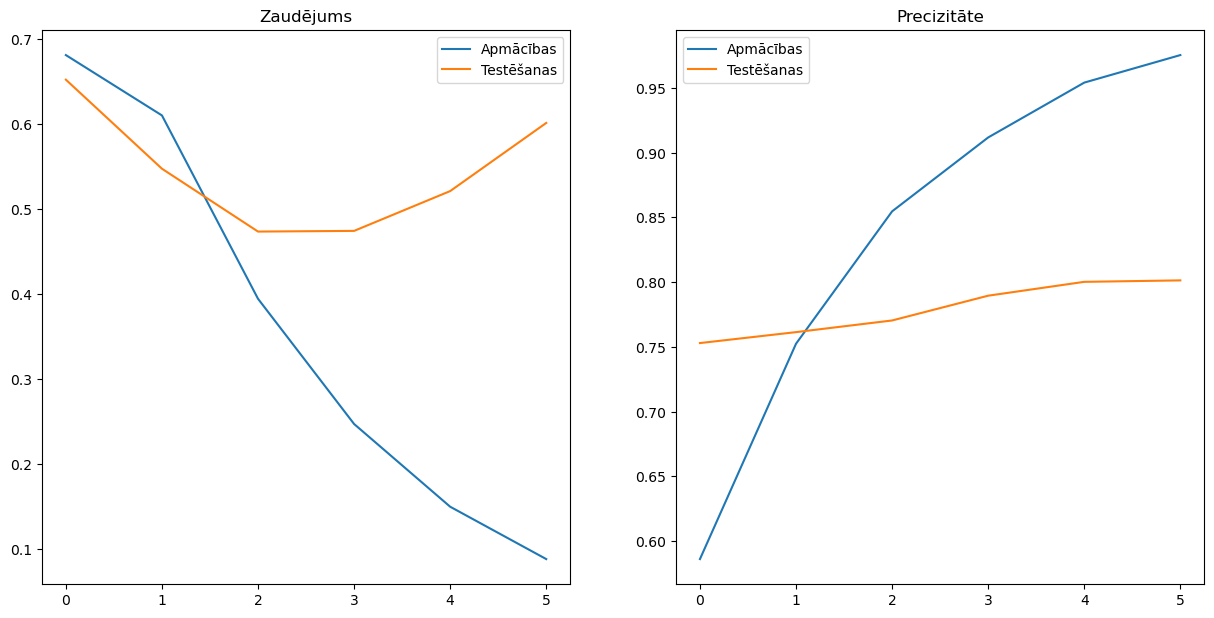

In [20]:
#https://github.com/shekarroy15/NLP_Sarcasm_Detection/blob/main/Sarcasam_Detector.ipynb
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))

ax1.plot(history5.history['loss'], label = 'Apmācības')
ax1.plot(history5.history['val_loss'], label = 'Testēšanas')
ax1.set_title('Zaudējums')
ax1.legend(['Apmācības', 'Testēšanas'])

ax2.plot(history5.history['accuracy'], label = 'Apmācības')
ax2.plot(history5.history['val_accuracy'], label = 'Testēšanas')
ax2.set_title('Precizitāte')
ax2.legend(['Apmācības', 'Testēšanas'])

plt.show()

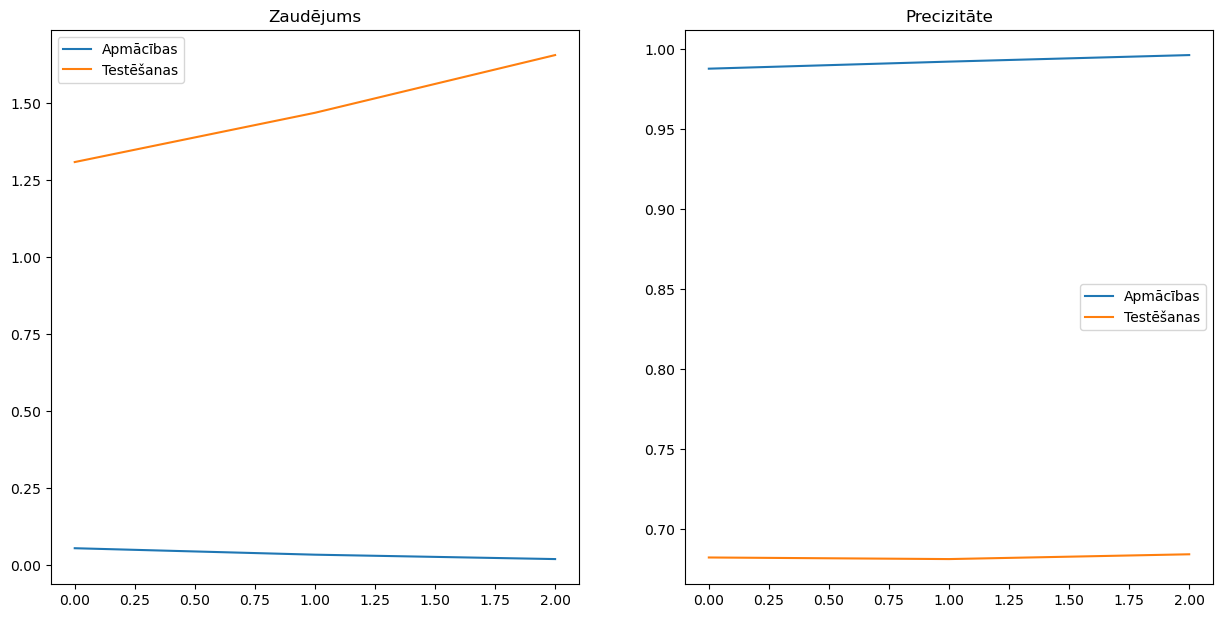

In [21]:
#https://github.com/shekarroy15/NLP_Sarcasm_Detection/blob/main/Sarcasam_Detector.ipynb
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))

ax1.plot(history6.history['loss'], label = 'Apmācības')
ax1.plot(history6.history['val_loss'], label = 'Testēšanas')
ax1.set_title('Zaudējums')
ax1.legend(['Apmācības', 'Testēšanas'])

ax2.plot(history6.history['accuracy'], label = 'Apmācības')
ax2.plot(history6.history['val_accuracy'], label = 'Testēšanas')
ax2.set_title('Precizitāte')
ax2.legend(['Apmācības', 'Testēšanas'])

plt.show()

In [22]:

prognozes_bilstm_apm = (bilstm.predict(apm_pads) > 0.5).astype("int32")
print(classification_report(dati_apm['vērtība'], prognozes_bilstm_apm))

prognozes_bilstm_test = (bilstm.predict(test_pads) > 0.5).astype("int32")
print(classification_report(dati_test['vērtība'], prognozes_bilstm_test))

prognozes_bilstm_neat= (bilstm.predict(neat_pads) > 0.5).astype("int32")
print(classification_report(dati_neat['vērtība'], prognozes_bilstm_neat))

192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3016
           1       1.00      1.00      1.00      3100

    accuracy                           1.00      6116
   macro avg       1.00      1.00      1.00      6116
weighted avg       1.00      1.00      1.00      6116

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       863
           1       0.84      0.74      0.79       914

    accuracy                           0.79      1777
   macro avg       0.80      0.80      0.79      1777
weighted avg       0.80      0.79      0.79      1777

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       501
           1       0.67      0.72      0.69       500

    accuracy                           0.68      1001
   mac

In [124]:
score_bilstm= bilstm.evaluate(test_pads, dati_test.vērtība)
print('Precizitāte:', score_bilstm[1])
score_bilstm2= bilstm.evaluate(neat_pads, dati_neat.vērtība)
print('Precizitāte:', score_bilstm2[1])

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8021 - loss: 0.9310
Precizitāte: 0.7940348982810974
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6797 - loss: 1.6582
Precizitāte: 0.6843156814575195


In [117]:

# confusion matricas izveide
conf_matrixs = confusion_matrix(dati_test.vērtība, prognozes_bilstm_test)

# vērtību definēšana
patiesi_negativi = conf_matrixs[0, 0]
nepatiesi_pozitivi = conf_matrixs[0, 1]
nepatiesi_negativi = conf_matrixs[1, 0]
patiesi_pozitivi = conf_matrixs[1, 1]
# izvade
print("Patiesi negatīvi:", patiesi_negativi)
print("Nepatiesi pozitīvi:", nepatiesi_pozitivi)
print("Nepatiesi negatīvi:", nepatiesi_negativi)
print("Patiesi pozitīvi:", patiesi_pozitivi)

Patiesi negatīvi: 736
Nepatiesi pozitīvi: 127
Nepatiesi negatīvi: 239
Patiesi pozitīvi: 675


In [119]:

# confusion matricas izveide
conf_matrixs = confusion_matrix(dati_neat.vērtība, prognozes_bilstm_neat)

# vērtību definēšana
patiesi_negativi = conf_matrixs[0, 0]
nepatiesi_pozitivi = conf_matrixs[0, 1]
nepatiesi_negativi = conf_matrixs[1, 0]
patiesi_pozitivi = conf_matrixs[1, 1]
# izvade
print("Patiesi negatīvi:", patiesi_negativi)
print("Nepatiesi pozitīvi:", nepatiesi_pozitivi)
print("Nepatiesi negatīvi:", nepatiesi_negativi)
print("Patiesi pozitīvi:", patiesi_pozitivi)

Patiesi negatīvi: 325
Nepatiesi pozitīvi: 176
Nepatiesi negatīvi: 140
Patiesi pozitīvi: 360


In [23]:
# bilstm -neat Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_neat.iterrows():
    print(f"Rinda {index}:")
    for column in dati_neat.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognozes_bilstm_neat[index]}")
    print("\n")

Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
teksts: programmētāj atšķir politiķ programmētāj maks programm strād
vērtība: 1
atsauce: https://anekdotes.eu/page/127
Reālā vērtība: 1, Klasificētā vērtība: [1]


Rinda 1:
teksts: mīļ atbrauc pakaļ plastisk ķirurģij klīnik dārg atpazīš
vērtība: 1
atsauce: https://anekdotes.eu/page/6
Reālā vērtība: 1, Klasificētā vērtība: [1]


Rinda 2:
teksts: bayer uzlab bundeslīg komand rekord nezaudēt spēl virkn
vērtība: 0
atsauce: https://sportacentrs.com/futbols/vacija/24022024-bayer_uzstada_bundesligas_komandu_rekordu
Reālā vērtība: 0, Klasificētā vērtība: [0]


Rinda 3:
teksts: loģistik apgrozījum pērn ievērojam saruc
vērtība: 0
atsauce: https://www.tvnet.lv/7981659/ldz-logistikas-apgrozijums-pern-ieverojami-sarucis
Reālā vērtība: 0, Klasificētā vērtība: [0]


Rinda 4:
teksts: ranger hokejist izcīn devīt uzvar kārt
vērtība: 0
atsauce: https://sportacentrs.com/hokejs/nhl/23022024-rangers_hokejisti_izcina_devito_uzvaru_pe
Reālā vērtība:

In [8]:
#https://www.kaggle.com/code/nikhilkohli/sarcasm-detection-using-lstm-gru-85-accuracy/notebook
import tensorflow as tf
#lstm
lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vardi, embedding_dim, input_shape=(max_garums,)),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [9]:
lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history7=lstm.fit(apm_pads, dati_apm.vērtība, batch_size=256,epochs=5, validation_data=(test_pads, dati_test.vērtība))
     

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - accuracy: 0.5031 - loss: 0.6924 - val_accuracy: 0.7417 - val_loss: 0.6833
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.7558 - loss: 0.6618 - val_accuracy: 0.7642 - val_loss: 0.5700
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.8424 - loss: 0.4472 - val_accuracy: 0.7907 - val_loss: 0.4608
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.9127 - loss: 0.2359 - val_accuracy: 0.8002 - val_loss: 0.4780
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.9610 - loss: 0.1372 - val_accuracy: 0.7991 - val_loss: 0.5499


In [10]:

history8=lstm.fit(apm_pads, dati_apm.vērtība, batch_size=256,epochs=3, validation_data=(neat_pads, dati_neat.vērtība))
     

Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.9705 - loss: 0.1020 - val_accuracy: 0.6743 - val_loss: 1.0788
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.9803 - loss: 0.0717 - val_accuracy: 0.6703 - val_loss: 1.2121
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.9886 - loss: 0.0527 - val_accuracy: 0.6733 - val_loss: 1.3401


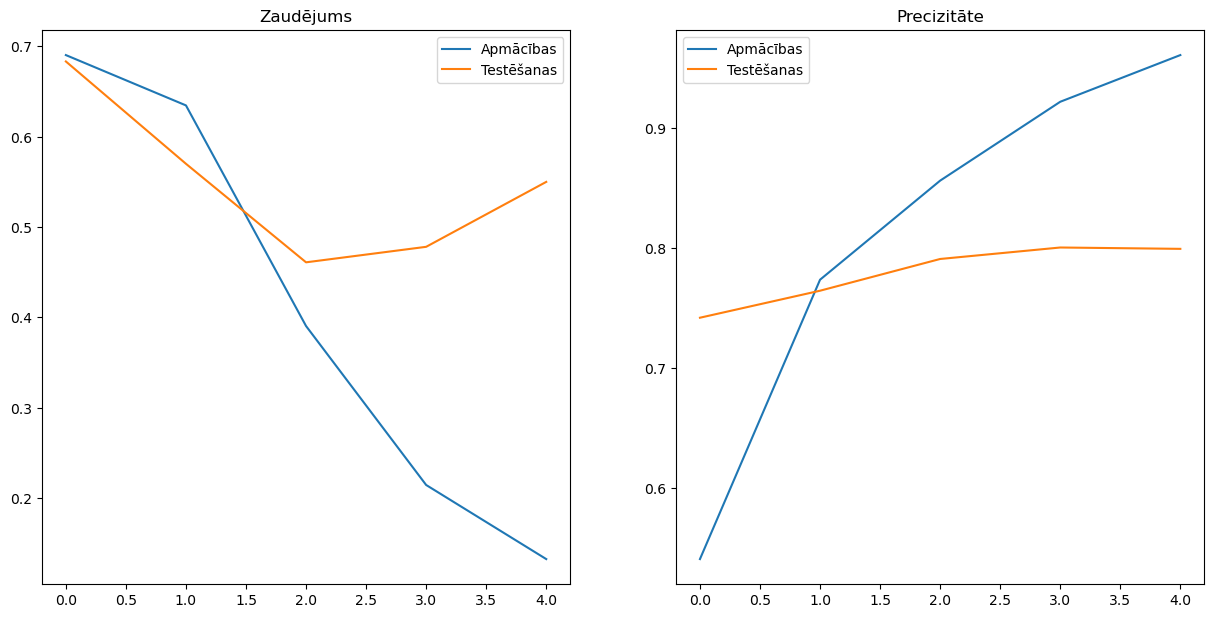

In [11]:
#https://github.com/shekarroy15/NLP_Sarcasm_Detection/blob/main/Sarcasam_Detector.ipynb
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))

ax1.plot(history7.history['loss'], label = 'Apmācības')
ax1.plot(history7.history['val_loss'], label = 'Testēšanas')
ax1.set_title('Zaudējums')
ax1.legend(['Apmācības', 'Testēšanas'])

ax2.plot(history7.history['accuracy'], label = 'Apmācības')
ax2.plot(history7.history['val_accuracy'], label = 'Testēšanas')
ax2.set_title('Precizitāte')
ax2.legend(['Apmācības', 'Testēšanas'])

plt.show()

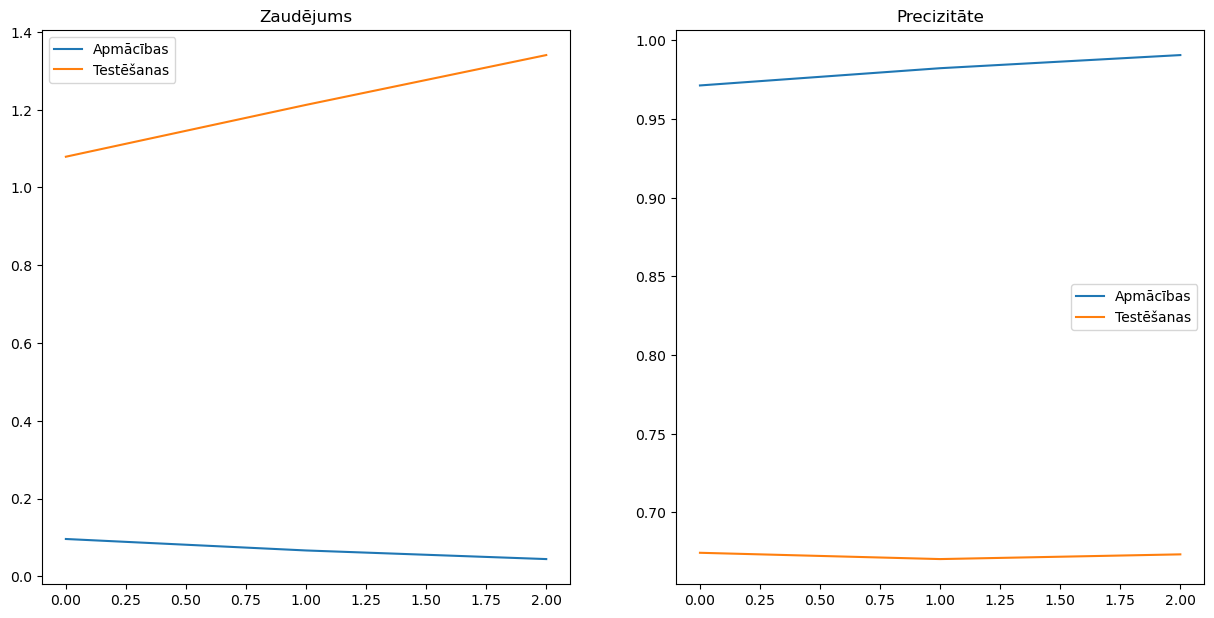

In [12]:
#https://github.com/shekarroy15/NLP_Sarcasm_Detection/blob/main/Sarcasam_Detector.ipynb
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))

ax1.plot(history8.history['loss'], label = 'Apmācības')
ax1.plot(history8.history['val_loss'], label = 'Testēšanas')
ax1.set_title('Zaudējums')
ax1.legend(['Apmācības', 'Testēšanas'])

ax2.plot(history8.history['accuracy'], label = 'Apmācības')
ax2.plot(history8.history['val_accuracy'], label = 'Testēšanas')
ax2.set_title('Precizitāte')
ax2.legend(['Apmācības', 'Testēšanas'])

plt.show()

In [14]:
from sklearn.metrics import classification_report
prognozes_lstm_apm = (lstm.predict(apm_pads) > 0.5).astype("int32")
print(classification_report(dati_apm['vērtība'], prognozes_lstm_apm))

prognozes_lstm_test = (lstm.predict(test_pads) > 0.5).astype("int32")
print(classification_report(dati_test['vērtība'], prognozes_lstm_test))

prognozes_lstm_neat= (lstm.predict(neat_pads) > 0.5).astype("int32")
print(classification_report(dati_neat['vērtība'], prognozes_lstm_neat))

192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3016
           1       0.99      1.00      1.00      3100

    accuracy                           1.00      6116
   macro avg       1.00      1.00      1.00      6116
weighted avg       1.00      1.00      1.00      6116

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       863
           1       0.81      0.78      0.80       914

    accuracy                           0.79      1777
   macro avg       0.79      0.79      0.79      1777
weighted avg       0.79      0.79      0.79      1777

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
              precision    recall  f1-score   support

           0       0.69      0.62      0.66       501
           1       0.66      0.73      0.69       500

    accuracy                           0.67      1001
   mac

In [126]:
score_lstm= lstm.evaluate(test_pads, dati_test.vērtība)
print('Precizitāte:', score_lstm[1])
score_lstm2= lstm.evaluate(neat_pads, dati_neat.vērtība)
print('Precizitāte:', score_lstm2[1])

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7749 - loss: 0.7886
Precizitāte: 0.793472170829773
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6745 - loss: 1.3540
Precizitāte: 0.6733266711235046


In [122]:

# confusion matricas izveide
conf_matrixs = confusion_matrix(dati_test.vērtība, prognozes_lstm_test)

# vērtību definēšana
patiesi_negativi = conf_matrixs[0, 0]
nepatiesi_pozitivi = conf_matrixs[0, 1]
nepatiesi_negativi = conf_matrixs[1, 0]
patiesi_pozitivi = conf_matrixs[1, 1]
# izvade
print("Patiesi negatīvi:", patiesi_negativi)
print("Nepatiesi pozitīvi:", nepatiesi_pozitivi)
print("Nepatiesi negatīvi:", nepatiesi_negativi)
print("Patiesi pozitīvi:", patiesi_pozitivi)

Patiesi negatīvi: 695
Nepatiesi pozitīvi: 168
Nepatiesi negatīvi: 199
Patiesi pozitīvi: 715


In [123]:

# confusion matricas izveide
conf_matrixs = confusion_matrix(dati_neat.vērtība, prognozes_lstm_neat)

# vērtību definēšana
patiesi_negativi = conf_matrixs[0, 0]
nepatiesi_pozitivi = conf_matrixs[0, 1]
nepatiesi_negativi = conf_matrixs[1, 0]
patiesi_pozitivi = conf_matrixs[1, 1]
# izvade
print("Patiesi negatīvi:", patiesi_negativi)
print("Nepatiesi pozitīvi:", nepatiesi_pozitivi)
print("Nepatiesi negatīvi:", nepatiesi_negativi)
print("Patiesi pozitīvi:", patiesi_pozitivi)

Patiesi negatīvi: 311
Nepatiesi pozitīvi: 190
Nepatiesi negatīvi: 137
Patiesi pozitīvi: 363


In [15]:
# lstm -neat Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_neat.iterrows():
    print(f"Rinda {index}:")
    for column in dati_neat.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognozes_lstm_neat[index]}")
    print("\n")

Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
teksts: programmētāj atšķir politiķ programmētāj maks programm strād
vērtība: 1
atsauce: https://anekdotes.eu/page/127
Reālā vērtība: 1, Klasificētā vērtība: [0]


Rinda 1:
teksts: mīļ atbrauc pakaļ plastisk ķirurģij klīnik dārg atpazīš
vērtība: 1
atsauce: https://anekdotes.eu/page/6
Reālā vērtība: 1, Klasificētā vērtība: [1]


Rinda 2:
teksts: bayer uzlab bundeslīg komand rekord nezaudēt spēl virkn
vērtība: 0
atsauce: https://sportacentrs.com/futbols/vacija/24022024-bayer_uzstada_bundesligas_komandu_rekordu
Reālā vērtība: 0, Klasificētā vērtība: [1]


Rinda 3:
teksts: loģistik apgrozījum pērn ievērojam saruc
vērtība: 0
atsauce: https://www.tvnet.lv/7981659/ldz-logistikas-apgrozijums-pern-ieverojami-sarucis
Reālā vērtība: 0, Klasificētā vērtība: [0]


Rinda 4:
teksts: ranger hokejist izcīn devīt uzvar kārt
vērtība: 0
atsauce: https://sportacentrs.com/hokejs/nhl/23022024-rangers_hokejisti_izcina_devito_uzvaru_pe
Reālā vērtība:

In [2]:
#https://github.com/nguyenduchuyvn/Udacity-Data-Scientist-Nanodegree/blob/main/MyCapstoneProject/Sarcasm_Detection.ipynb
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
# tf_idf vektora izveide
tf_idf_vekt = TfidfVectorizer()

# Apmācības un testa datu kopas vektorizācija, izmantojot to vienu vārdnīcu
apm_vekt = tf_idf_vekt.fit_transform(dati_apm.latviski)
test_vekt = tf_idf_vekt.transform(dati_test.latviski)
neat_vekt = tf_idf_vekt.transform(dati_neat.teksts)

In [9]:
#https://github.com/jrbjrb1212/Sarcasm-Detection/blob/main/Decision%20Tree/DecisionTree.ipynb
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(criterion="entropy")
model.fit(apm_vekt, dati_apm.vērtība)
prognoze = model.predict(test_vekt)
# prognozes veikšana neatkarīgo datu kopai
prognoze_neat = model.predict(neat_vekt)
# prognožu salīdzināšana ar reālo vērtību
print(classification_report(dati_test.vērtība, prognoze))
print(classification_report(dati_neat.vērtība, prognoze_neat))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       863
           1       0.74      0.71      0.72       914

    accuracy                           0.72      1777
   macro avg       0.72      0.72      0.72      1777
weighted avg       0.72      0.72      0.72      1777

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       501
           1       0.65      0.62      0.63       500

    accuracy                           0.64      1001
   macro avg       0.64      0.64      0.64      1001
weighted avg       0.64      0.64      0.64      1001



In [8]:
#https://github.com/jrbjrb1212/Sarcasm-Detection/blob/main/Random%20Forest/RandomForest.ipynb
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(apm_vekt, dati_apm.vērtība)
prognoze = model.predict(test_vekt)
# prognozes veikšana neatkarīgo datu kopai
prognoze_neat = model.predict(neat_vekt)
# prognožu salīdzināšana ar reālo vērtību
print(classification_report(dati_test.vērtība, prognoze))
print(classification_report(dati_neat.vērtība, prognoze_neat))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       863
           1       0.80      0.73      0.76       914

    accuracy                           0.76      1777
   macro avg       0.77      0.77      0.76      1777
weighted avg       0.77      0.76      0.76      1777

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       501
           1       0.68      0.64      0.66       500

    accuracy                           0.67      1001
   macro avg       0.67      0.67      0.67      1001
weighted avg       0.67      0.67      0.67      1001



In [88]:
#https://colab.research.google.com/github/jonathanbgn/social-media-sentiment-analysis/blob/master/Practical_Introduction_BERT.ipynb#scrollTo=lghqatAY4_n0

from sklearn.naive_bayes import MultinomialNB
# Multinomiālā NB modeļa definēšana un apmācība
model = MultinomialNB()
model.fit(apm_vekt.toarray(), dati_apm.vērtība)
# prognozes veikšana testa datu kopai
prognoze = model.predict(test_vekt.toarray())
# prognozes veikšana neatkarīgo datu kopai
prognoze_neat = model.predict(neat_vekt.toarray())
# prognožu salīdzināšana ar reālo vērtību
print(classification_report(dati_test.vērtība, prognoze))
print(classification_report(dati_neat.vērtība, prognoze_neat))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75       863
           1       0.75      0.87      0.80       914

    accuracy                           0.78      1777
   macro avg       0.79      0.78      0.78      1777
weighted avg       0.79      0.78      0.78      1777

              precision    recall  f1-score   support

           0       0.77      0.49      0.59       501
           1       0.62      0.85      0.72       500

    accuracy                           0.67      1001
   macro avg       0.70      0.67      0.66      1001
weighted avg       0.70      0.67      0.66      1001



In [110]:
#https://github.com/jrbjrb1212/Sarcasm-Detection/blob/main/Logistic%20Regression/Logistic%20regression.ipynb
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(apm_vekt, dati_apm.vērtība)
prognoze = log_model.predict(test_vekt)
print(classification_report(dati_test.vērtība, prognoze))
prognoze_neat = log_model.predict(neat_vekt)
print(classification_report(dati_neat.vērtība, prognoze_neat))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       863
           1       0.79      0.78      0.79       914

    accuracy                           0.78      1777
   macro avg       0.78      0.78      0.78      1777
weighted avg       0.78      0.78      0.78      1777

              precision    recall  f1-score   support

           0       0.70      0.62      0.66       501
           1       0.66      0.73      0.69       500

    accuracy                           0.68      1001
   macro avg       0.68      0.68      0.68      1001
weighted avg       0.68      0.68      0.68      1001



In [103]:
#https://github.com/sachinsharma3191/Sarcasm-Detection/blob/master/Sarc_Detection.ipynb
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(apm_vekt.toarray(), dati_apm.vērtība)
prognoze = model.predict(test_vekt.toarray())
print(classification_report(dati_test.vērtība, prognoze))
prognoze_neat = model.predict(neat_vekt.toarray())
print(classification_report(dati_neat.vērtība, prognoze_neat))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75       863
           1       0.80      0.64      0.71       914

    accuracy                           0.73      1777
   macro avg       0.74      0.74      0.73      1777
weighted avg       0.75      0.73      0.73      1777

              precision    recall  f1-score   support

           0       0.64      0.74      0.68       501
           1       0.69      0.58      0.63       500

    accuracy                           0.66      1001
   macro avg       0.66      0.66      0.66      1001
weighted avg       0.66      0.66      0.66      1001



In [10]:
#https://github.com/nguyenduchuyvn/Udacity-Data-Scientist-Nanodegree/blob/main/MyCapstoneProject/Sarcasm_Detection.ipynb
from sklearn import svm
     
model = svm.SVC() 
model.fit(apm_vekt, dati_apm.vērtība)
prognoze = model.predict(test_vekt)
print(classification_report(dati_test.vērtība, prognoze))
prognoze_neat = model.predict(neat_vekt)
print(classification_report(dati_neat.vērtība, prognoze_neat))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       863
           1       0.80      0.78      0.79       914

    accuracy                           0.78      1777
   macro avg       0.78      0.78      0.78      1777
weighted avg       0.78      0.78      0.78      1777

              precision    recall  f1-score   support

           0       0.70      0.62      0.65       501
           1       0.66      0.73      0.69       500

    accuracy                           0.67      1001
   macro avg       0.68      0.67      0.67      1001
weighted avg       0.68      0.67      0.67      1001



In [128]:
#https://github.com/jrbjrb1212/Sarcasm-Detection/blob/main/KNN/KNN.ipynb
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20,metric="euclidean")
model.fit(apm_vekt, dati_apm.vērtība)
prognoze = model.predict(test_vekt)
print(classification_report(dati_test.vērtība, prognoze))
prognoze_neat = model.predict(neat_vekt)
print(classification_report(dati_neat.vērtība, prognoze_neat))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       863
           1       0.73      0.77      0.75       914

    accuracy                           0.74      1777
   macro avg       0.74      0.74      0.74      1777
weighted avg       0.74      0.74      0.74      1777

              precision    recall  f1-score   support

           0       0.70      0.52      0.60       501
           1       0.62      0.77      0.69       500

    accuracy                           0.65      1001
   macro avg       0.66      0.65      0.64      1001
weighted avg       0.66      0.65      0.64      1001



In [12]:
from sklearn.metrics import confusion_matrix

# confusion matricas izveide
conf_matrixs = confusion_matrix(dati_test.vērtība, prognoze)

# vērtību definēšana
patiesi_negativi = conf_matrixs[0, 0]
nepatiesi_pozitivi = conf_matrixs[0, 1]
nepatiesi_negativi = conf_matrixs[1, 0]
patiesi_pozitivi = conf_matrixs[1, 1]
# izvade
print("Patiesi negatīvi:", patiesi_negativi)
print("Nepatiesi pozitīvi:", nepatiesi_pozitivi)
print("Nepatiesi negatīvi:", nepatiesi_negativi)
print("Patiesi pozitīvi:", patiesi_pozitivi)


Patiesi negatīvi: 681
Nepatiesi pozitīvi: 182
Nepatiesi negatīvi: 202
Patiesi pozitīvi: 712


In [13]:
from sklearn.metrics import confusion_matrix
# confusion matricas izveide
conf_matrix = confusion_matrix(dati_neat.vērtība, prognoze_neat)

# vērtību definēšana
patiesi_negativi = conf_matrix[0, 0]
nepatiesi_pozitivi = conf_matrix[0, 1]
nepatiesi_negativi = conf_matrix[1, 0]
patiesi_pozitivi = conf_matrix[1, 1]
# izvade
print("Patiesi negatīvi:", patiesi_negativi)
print("Nepatiesi pozitīvi:", nepatiesi_pozitivi)
print("Nepatiesi negatīvi:", nepatiesi_negativi)
print("Patiesi pozitīvi:", patiesi_pozitivi)


Patiesi negatīvi: 309
Nepatiesi pozitīvi: 192
Nepatiesi negatīvi: 134
Patiesi pozitīvi: 366


In [75]:
# Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_test.iterrows():
    print(f"Rinda {index}:")
    for column in dati_test.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze[index]}")
    print("\n")


Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
angliski: 10 resolutions every woman should make in 2017
latviski: apņemšan gad jāizpild katr sieviet
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 1


Rinda 1:
angliski: 10 days that shook the regressive world
latviski: dien satricināj regresīv pasaul
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 1


Rinda 2:
angliski: 10 delicious ways to cook with maple syrup
latviski: garšīg veid pagatavot ēdien kļav sīrup
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 1


Rinda 3:
angliski: 10 reasons to visit scotland this year
latviski: iemesl šogad apmeklēt skotij
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-s

In [77]:
# Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_neat.iterrows():
    print(f"Rinda {index}:")
    for column in dati_neat.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze_neat[index]}")
    print("\n")


Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
teksts: programmētāj atšķir politiķ programmētāj maks programm strād
vērtība: 1
atsauce: https://anekdotes.eu/page/127
Reālā vērtība: 1, Klasificētā vērtība: 0


Rinda 1:
teksts: mīļ atbrauc pakaļ plastisk ķirurģij klīnik dārg atpazīš
vērtība: 1
atsauce: https://anekdotes.eu/page/6
Reālā vērtība: 1, Klasificētā vērtība: 1


Rinda 2:
teksts: bayer uzlab bundeslīg komand rekord nezaudēt spēl virkn
vērtība: 0
atsauce: https://sportacentrs.com/futbols/vacija/24022024-bayer_uzstada_bundesligas_komandu_rekordu
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 3:
teksts: loģistik apgrozījum pērn ievērojam saruc
vērtība: 0
atsauce: https://www.tvnet.lv/7981659/ldz-logistikas-apgrozijums-pern-ieverojami-sarucis
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 4:
teksts: ranger hokejist izcīn devīt uzvar kārt
vērtība: 0
atsauce: https://sportacentrs.com/hokejs/nhl/23022024-rangers_hokejisti_izcina_devito_uzvaru_pe
Reālā vērtība: 0, Klas

In [84]:
# gadijuma mezs - test Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_test.iterrows():
    print(f"Rinda {index}:")
    for column in dati_test.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze[index]}")
    print("\n")


Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
angliski: 10 resolutions every woman should make in 2017
latviski: apņemšan gad jāizpild katr sieviet
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 1:
angliski: 10 days that shook the regressive world
latviski: dien satricināj regresīv pasaul
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 1


Rinda 2:
angliski: 10 delicious ways to cook with maple syrup
latviski: garšīg veid pagatavot ēdien kļav sīrup
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 3:
angliski: 10 reasons to visit scotland this year
latviski: iemesl šogad apmeklēt skotij
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-s

In [85]:
# gadijuma mezs -neat Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_neat.iterrows():
    print(f"Rinda {index}:")
    for column in dati_neat.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze_neat[index]}")
    print("\n")


Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
teksts: programmētāj atšķir politiķ programmētāj maks programm strād
vērtība: 1
atsauce: https://anekdotes.eu/page/127
Reālā vērtība: 1, Klasificētā vērtība: 0


Rinda 1:
teksts: mīļ atbrauc pakaļ plastisk ķirurģij klīnik dārg atpazīš
vērtība: 1
atsauce: https://anekdotes.eu/page/6
Reālā vērtība: 1, Klasificētā vērtība: 0


Rinda 2:
teksts: bayer uzlab bundeslīg komand rekord nezaudēt spēl virkn
vērtība: 0
atsauce: https://sportacentrs.com/futbols/vacija/24022024-bayer_uzstada_bundesligas_komandu_rekordu
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 3:
teksts: loģistik apgrozījum pērn ievērojam saruc
vērtība: 0
atsauce: https://www.tvnet.lv/7981659/ldz-logistikas-apgrozijums-pern-ieverojami-sarucis
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 4:
teksts: ranger hokejist izcīn devīt uzvar kārt
vērtība: 0
atsauce: https://sportacentrs.com/hokejs/nhl/23022024-rangers_hokejisti_izcina_devito_uzvaru_pe
Reālā vērtība: 0, Klas

In [93]:
#nb - test Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_test.iterrows():
    print(f"Rinda {index}:")
    for column in dati_test.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze[index]}")
    print("\n")


Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
angliski: 10 resolutions every woman should make in 2017
latviski: apņemšan gad jāizpild katr sieviet
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 1:
angliski: 10 days that shook the regressive world
latviski: dien satricināj regresīv pasaul
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 2:
angliski: 10 delicious ways to cook with maple syrup
latviski: garšīg veid pagatavot ēdien kļav sīrup
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 3:
angliski: 10 reasons to visit scotland this year
latviski: iemesl šogad apmeklēt skotij
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-s

In [94]:
# nb -neat Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_neat.iterrows():
    print(f"Rinda {index}:")
    for column in dati_neat.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze_neat[index]}")
    print("\n")


Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
teksts: programmētāj atšķir politiķ programmētāj maks programm strād
vērtība: 1
atsauce: https://anekdotes.eu/page/127
Reālā vērtība: 1, Klasificētā vērtība: 1


Rinda 1:
teksts: mīļ atbrauc pakaļ plastisk ķirurģij klīnik dārg atpazīš
vērtība: 1
atsauce: https://anekdotes.eu/page/6
Reālā vērtība: 1, Klasificētā vērtība: 1


Rinda 2:
teksts: bayer uzlab bundeslīg komand rekord nezaudēt spēl virkn
vērtība: 0
atsauce: https://sportacentrs.com/futbols/vacija/24022024-bayer_uzstada_bundesligas_komandu_rekordu
Reālā vērtība: 0, Klasificētā vērtība: 1


Rinda 3:
teksts: loģistik apgrozījum pērn ievērojam saruc
vērtība: 0
atsauce: https://www.tvnet.lv/7981659/ldz-logistikas-apgrozijums-pern-ieverojami-sarucis
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 4:
teksts: ranger hokejist izcīn devīt uzvar kārt
vērtība: 0
atsauce: https://sportacentrs.com/hokejs/nhl/23022024-rangers_hokejisti_izcina_devito_uzvaru_pe
Reālā vērtība: 0, Klas

In [113]:
# logreg - test Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_test.iterrows():
    print(f"Rinda {index}:")
    for column in dati_test.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze[index]}")
    print("\n")

Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
angliski: 10 resolutions every woman should make in 2017
latviski: apņemšan gad jāizpild katr sieviet
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 1:
angliski: 10 days that shook the regressive world
latviski: dien satricināj regresīv pasaul
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 1


Rinda 2:
angliski: 10 delicious ways to cook with maple syrup
latviski: garšīg veid pagatavot ēdien kļav sīrup
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 3:
angliski: 10 reasons to visit scotland this year
latviski: iemesl šogad apmeklēt skotij
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-s

In [114]:
# logreg-neat Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_neat.iterrows():
    print(f"Rinda {index}:")
    for column in dati_neat.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze_neat[index]}")
    print("\n")

Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
teksts: programmētāj atšķir politiķ programmētāj maks programm strād
vērtība: 1
atsauce: https://anekdotes.eu/page/127
Reālā vērtība: 1, Klasificētā vērtība: 0


Rinda 1:
teksts: mīļ atbrauc pakaļ plastisk ķirurģij klīnik dārg atpazīš
vērtība: 1
atsauce: https://anekdotes.eu/page/6
Reālā vērtība: 1, Klasificētā vērtība: 0


Rinda 2:
teksts: bayer uzlab bundeslīg komand rekord nezaudēt spēl virkn
vērtība: 0
atsauce: https://sportacentrs.com/futbols/vacija/24022024-bayer_uzstada_bundesligas_komandu_rekordu
Reālā vērtība: 0, Klasificētā vērtība: 1


Rinda 3:
teksts: loģistik apgrozījum pērn ievērojam saruc
vērtība: 0
atsauce: https://www.tvnet.lv/7981659/ldz-logistikas-apgrozijums-pern-ieverojami-sarucis
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 4:
teksts: ranger hokejist izcīn devīt uzvar kārt
vērtība: 0
atsauce: https://sportacentrs.com/hokejs/nhl/23022024-rangers_hokejisti_izcina_devito_uzvaru_pe
Reālā vērtība: 0, Klas

In [106]:
#xgb - test Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_test.iterrows():
    print(f"Rinda {index}:")
    for column in dati_test.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze[index]}")
    print("\n")

Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
angliski: 10 resolutions every woman should make in 2017
latviski: apņemšan gad jāizpild katr sieviet
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 1:
angliski: 10 days that shook the regressive world
latviski: dien satricināj regresīv pasaul
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 1


Rinda 2:
angliski: 10 delicious ways to cook with maple syrup
latviski: garšīg veid pagatavot ēdien kļav sīrup
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 3:
angliski: 10 reasons to visit scotland this year
latviski: iemesl šogad apmeklēt skotij
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-s

In [107]:
# xgb -neat Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_neat.iterrows():
    print(f"Rinda {index}:")
    for column in dati_neat.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze_neat[index]}")
    print("\n")

Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
teksts: programmētāj atšķir politiķ programmētāj maks programm strād
vērtība: 1
atsauce: https://anekdotes.eu/page/127
Reālā vērtība: 1, Klasificētā vērtība: 0


Rinda 1:
teksts: mīļ atbrauc pakaļ plastisk ķirurģij klīnik dārg atpazīš
vērtība: 1
atsauce: https://anekdotes.eu/page/6
Reālā vērtība: 1, Klasificētā vērtība: 0


Rinda 2:
teksts: bayer uzlab bundeslīg komand rekord nezaudēt spēl virkn
vērtība: 0
atsauce: https://sportacentrs.com/futbols/vacija/24022024-bayer_uzstada_bundesligas_komandu_rekordu
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 3:
teksts: loģistik apgrozījum pērn ievērojam saruc
vērtība: 0
atsauce: https://www.tvnet.lv/7981659/ldz-logistikas-apgrozijums-pern-ieverojami-sarucis
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 4:
teksts: ranger hokejist izcīn devīt uzvar kārt
vērtība: 0
atsauce: https://sportacentrs.com/hokejs/nhl/23022024-rangers_hokejisti_izcina_devito_uzvaru_pe
Reālā vērtība: 0, Klas

In [120]:
#svm- test Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_test.iterrows():
    print(f"Rinda {index}:")
    for column in dati_test.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze[index]}")
    print("\n")

Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
angliski: 10 resolutions every woman should make in 2017
latviski: apņemšan gad jāizpild katr sieviet
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 1:
angliski: 10 days that shook the regressive world
latviski: dien satricināj regresīv pasaul
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 1


Rinda 2:
angliski: 10 delicious ways to cook with maple syrup
latviski: garšīg veid pagatavot ēdien kļav sīrup
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 3:
angliski: 10 reasons to visit scotland this year
latviski: iemesl šogad apmeklēt skotij
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-s

In [121]:
# svm -neat Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_neat.iterrows():
    print(f"Rinda {index}:")
    for column in dati_neat.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze_neat[index]}")
    print("\n")

Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
teksts: programmētāj atšķir politiķ programmētāj maks programm strād
vērtība: 1
atsauce: https://anekdotes.eu/page/127
Reālā vērtība: 1, Klasificētā vērtība: 0


Rinda 1:
teksts: mīļ atbrauc pakaļ plastisk ķirurģij klīnik dārg atpazīš
vērtība: 1
atsauce: https://anekdotes.eu/page/6
Reālā vērtība: 1, Klasificētā vērtība: 0


Rinda 2:
teksts: bayer uzlab bundeslīg komand rekord nezaudēt spēl virkn
vērtība: 0
atsauce: https://sportacentrs.com/futbols/vacija/24022024-bayer_uzstada_bundesligas_komandu_rekordu
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 3:
teksts: loģistik apgrozījum pērn ievērojam saruc
vērtība: 0
atsauce: https://www.tvnet.lv/7981659/ldz-logistikas-apgrozijums-pern-ieverojami-sarucis
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 4:
teksts: ranger hokejist izcīn devīt uzvar kārt
vērtība: 0
atsauce: https://sportacentrs.com/hokejs/nhl/23022024-rangers_hokejisti_izcina_devito_uzvaru_pe
Reālā vērtība: 0, Klas

In [131]:
#knn- test Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_test.iterrows():
    print(f"Rinda {index}:")
    for column in dati_test.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze[index]}")
    print("\n")

Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
angliski: 10 resolutions every woman should make in 2017
latviski: apņemšan gad jāizpild katr sieviet
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 1


Rinda 1:
angliski: 10 days that shook the regressive world
latviski: dien satricināj regresīv pasaul
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 1


Rinda 2:
angliski: 10 delicious ways to cook with maple syrup
latviski: garšīg veid pagatavot ēdien kļav sīrup
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
Reālā vērtība: 0, Klasificētā vērtība: 0


Rinda 3:
angliski: 10 reasons to visit scotland this year
latviski: iemesl šogad apmeklēt skotij
vērtība: 0
atsauce: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-s

In [132]:
# knn -neat Izvadam visas rindas un to reālās un klasificētās vērtības
print("Visas rindas un to reālās un klasificētās vērtības:")
for index, row in dati_neat.iterrows():
    print(f"Rinda {index}:")
    for column in dati_neat.columns:
        print(f"{column}: {row[column]}")
    print(f"Reālā vērtība: {row['vērtība']}, Klasificētā vērtība: {prognoze_neat[index]}")
    print("\n")

Visas rindas un to reālās un klasificētās vērtības:
Rinda 0:
teksts: programmētāj atšķir politiķ programmētāj maks programm strād
vērtība: 1
atsauce: https://anekdotes.eu/page/127
Reālā vērtība: 1, Klasificētā vērtība: 0


Rinda 1:
teksts: mīļ atbrauc pakaļ plastisk ķirurģij klīnik dārg atpazīš
vērtība: 1
atsauce: https://anekdotes.eu/page/6
Reālā vērtība: 1, Klasificētā vērtība: 0


Rinda 2:
teksts: bayer uzlab bundeslīg komand rekord nezaudēt spēl virkn
vērtība: 0
atsauce: https://sportacentrs.com/futbols/vacija/24022024-bayer_uzstada_bundesligas_komandu_rekordu
Reālā vērtība: 0, Klasificētā vērtība: 1


Rinda 3:
teksts: loģistik apgrozījum pērn ievērojam saruc
vērtība: 0
atsauce: https://www.tvnet.lv/7981659/ldz-logistikas-apgrozijums-pern-ieverojami-sarucis
Reālā vērtība: 0, Klasificētā vērtība: 1


Rinda 4:
teksts: ranger hokejist izcīn devīt uzvar kārt
vērtība: 0
atsauce: https://sportacentrs.com/hokejs/nhl/23022024-rangers_hokejisti_izcina_devito_uzvaru_pe
Reālā vērtība: 0, Klas